### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

$METROPOLIS$

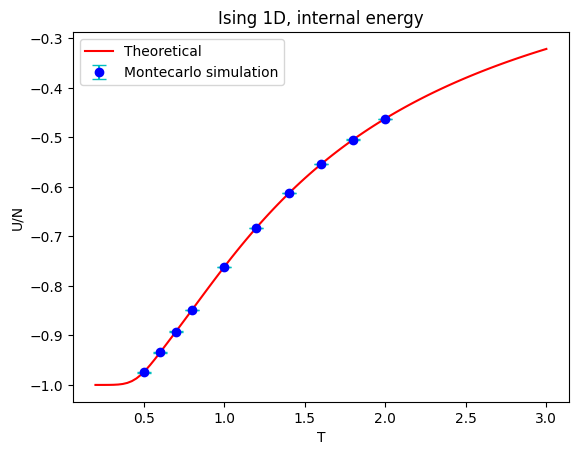

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ENERGIA INTERNA
data_E = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\E_tot.txt'
T = []
E = []
ERROR_E = []
with open(data_E, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        T.append(float(values[0]))
        E.append(float(values[1]))
        ERROR_E.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, E, yerr=ERROR_E, fmt='o', color='b', ecolor='c', capsize=5, label='Montecarlo simulation')

# Curva teorica
points=100
t = np.linspace(0.2,3.0,num=points)
beta = 1/t
J = 1.0
Ns = 50
th = np.tanh(J/t)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(t, e, color='r', label='Theoretical')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Utente\AppData\Local\Temp\ipykernel_15084\2596553482.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


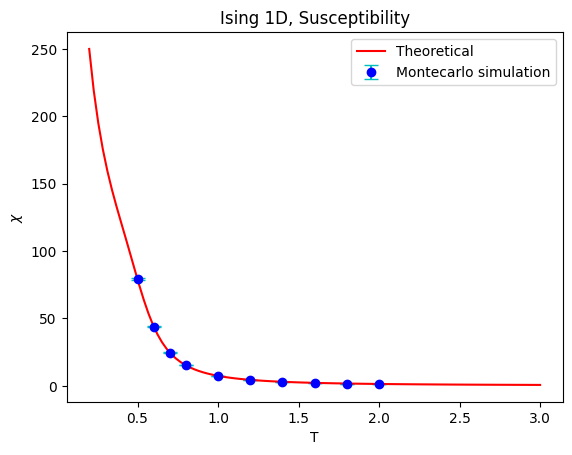

In [4]:
# SUSCETTIVITA'
data_chi = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\chi.txt'
CHI = []
ERROR_chi = []
with open(data_chi, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        CHI.append(float(values[1]))
        ERROR_chi.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, CHI, yerr=ERROR_chi, fmt='o', color='b', ecolor='c', capsize=5, label='Montecarlo simulation')

# Andamento teorico
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(t, X, color='r', label='Theoretical')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()

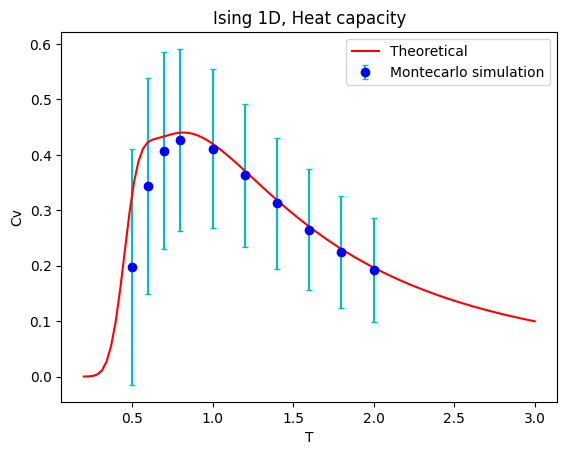

In [5]:
# CALORE SPECIFICO
data_cv = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\cv.txt'
CV = []
ERROR_CV = []
with open(data_cv, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        CV.append(float(values[1]))
        ERROR_CV.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, CV, yerr=ERROR_CV, fmt='o', color='b', ecolor='c', capsize=2, label='Montecarlo simulation')

# Andamento teorico
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(t, heat, color='r', label='Theoretical')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('Cv')
plt.legend()
plt.show()

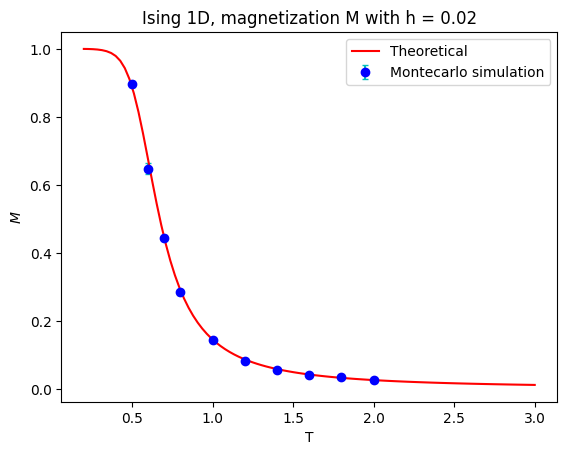

In [6]:
# MAGNETIZZAZIONE
data_M = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\M.txt'
M = []
ERROR_M = []
with open(data_M, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        M.append(float(values[1]))
        ERROR_M.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, M, yerr=ERROR_M, fmt='o', color='b', ecolor='c', capsize=2, label='Montecarlo simulation')

# Andamento teorico
h=0.02 #external field
b = 1/t

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(t, M, color='r', label='Theoretical')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.show()

$GIBBS$

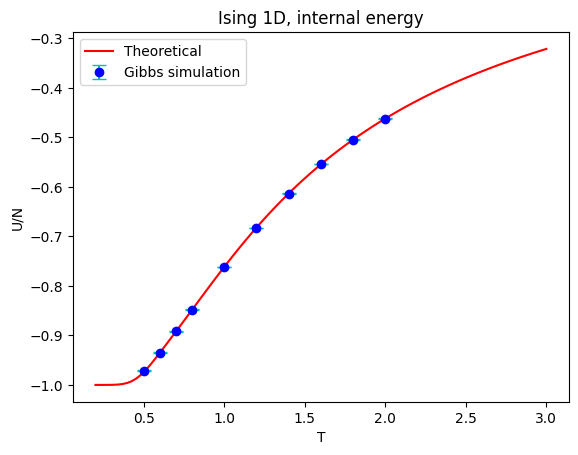

In [7]:
# ENERGIA INTERNA
data_E = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\E_tot_gibbs.txt'
T = []
E = []
ERROR_E = []
with open(data_E, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        T.append(float(values[0]))
        E.append(float(values[1]))
        ERROR_E.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, E, yerr=ERROR_E, fmt='o', color='b', ecolor='c', capsize=5, label='Gibbs simulation')

# Curva teorica
points=100
t = np.linspace(0.2,3.0,num=points)
beta = 1/t
J = 1.0
Ns = 50
th = np.tanh(J/t)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(t, e, color='r', label='Theoretical')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Utente\AppData\Local\Temp\ipykernel_15084\3600421231.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


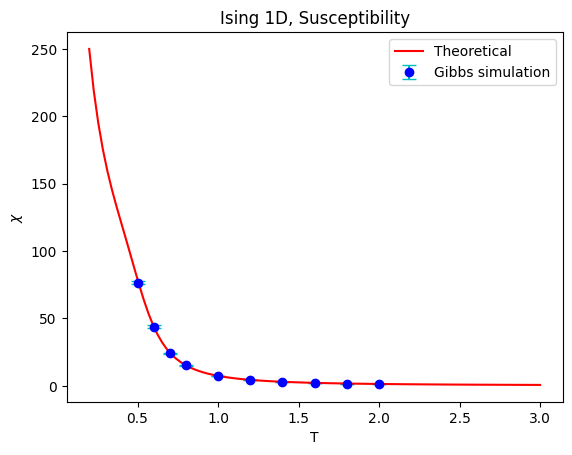

In [8]:
# SUSCETTIVITA'
data_chi = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\chi_gibbs.txt'
CHI = []
ERROR_chi = []
with open(data_chi, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        CHI.append(float(values[1]))
        ERROR_chi.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, CHI, yerr=ERROR_chi, fmt='o', color='b', ecolor='c', capsize=5, label='Gibbs simulation')

# Andamento teorico
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(t, X, color='r', label='Theoretical')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()

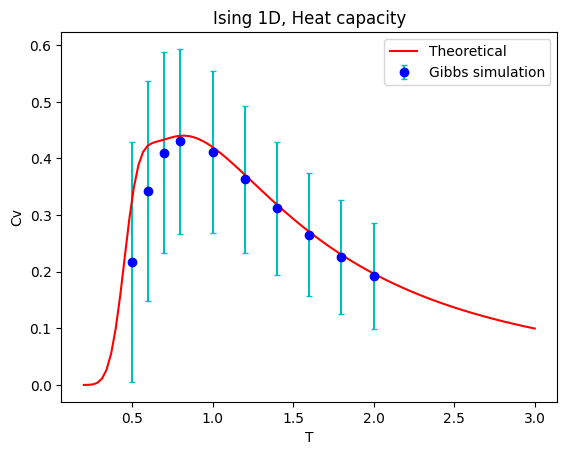

In [9]:
# CALORE SPECIFICO
data_cv = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\cv_gibbs.txt'
CV = []
ERROR_CV = []
with open(data_cv, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        CV.append(float(values[1]))
        ERROR_CV.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, CV, yerr=ERROR_CV, fmt='o', color='b', ecolor='c', capsize=2, label='Gibbs simulation')

# Andamento teorico
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(t, heat, color='r', label='Theoretical')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('Cv')
plt.legend()
plt.show()

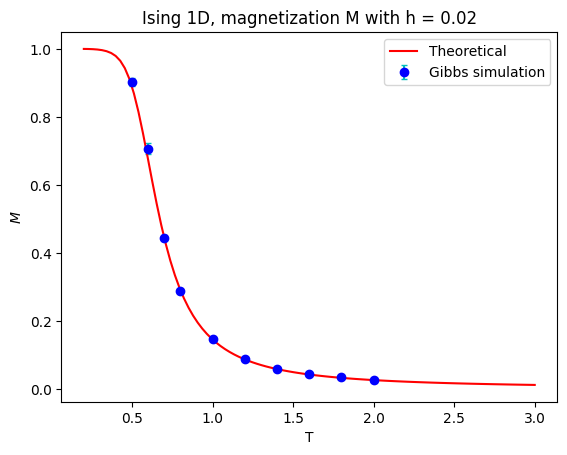

In [10]:
# MAGNETIZZAZZIONE
data_M = r'C:\Users\Utente\Documents\Python Scripts\lezione_6\M_gibbs.txt'
M = []
ERROR_M = []
with open(data_M, 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        M.append(float(values[1]))
        ERROR_M.append(float(values[2]))

# Dati simulazione
plt.errorbar(T, M, yerr=ERROR_M, fmt='o', color='b', ecolor='c', capsize=2, label='Gibbs simulation')

# Andamento teorico
h=0.02 #external field
b = 1/t

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(t, M, color='r', label='Theoretical')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.show()